In [5]:
import yfinance as yf

# Define the Tesla ticker symbol
tesla_ticker = 'TSLA'

# Fetch Tesla stock data
tesla_data = yf.Ticker(tesla_ticker)

# Extract the historical market data
tesla_history = tesla_data.history(period="max")

# Display the first few rows of Tesla stock data
print(tesla_history.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [16]:
import yfinance as yf

# Define the stock symbol for GameStop
symbol = 'GME'

# Use yfinance to download historical data for GameStop
gme_stock_data = yf.Ticker(symbol)

# Extracting historical stock data (e.g., last 5 years)
gme_history = gme_stock_data.history(period='5y')

# Display the first few rows of the dataset
print(gme_history.head())

# Save the data to a CSV file
gme_history.to_csv('gamestop_stock_data.csv')



                             Open    High    Low   Close    Volume  Dividends  \
Date                                                                            
2019-10-08 00:00:00-04:00  1.3575  1.3600  1.290  1.3075  19292400        0.0   
2019-10-09 00:00:00-04:00  1.3125  1.3250  1.240  1.2475  23238400        0.0   
2019-10-10 00:00:00-04:00  1.2550  1.2875  1.240  1.2625  20912000        0.0   
2019-10-11 00:00:00-04:00  1.2850  1.3725  1.285  1.3425  23636800        0.0   
2019-10-14 00:00:00-04:00  1.3300  1.3975  1.305  1.3950  21095600        0.0   

                           Stock Splits  
Date                                     
2019-10-08 00:00:00-04:00           0.0  
2019-10-09 00:00:00-04:00           0.0  
2019-10-10 00:00:00-04:00           0.0  
2019-10-11 00:00:00-04:00           0.0  
2019-10-14 00:00:00-04:00           0.0  


In [57]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import yfinance as yf
import pandas as pd

# Function to create the graph
def make_graph(data, title):
    figure = go.Figure()
    figure.add_trace(go.Scatter(
        x=data['Date'],
        y=data['Close'],
        mode='lines',
        name='Tesla Stock Price'
    ))
    figure.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        template='plotly'
    )
    return figure

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')
tesla_data.reset_index(inplace=True)

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Tesla Stock Price Dashboard"),
    
    dcc.Graph(
        id='stock-graph',
        figure=make_graph(tesla_data, 'Tesla Stock Price Over Time')
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


[*********************100%***********************]  1 of 1 completed


In [59]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import yfinance as yf

# Fetch GameStop stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

# Function to create the stock price graph
def make_graph(data):
    figure = go.Figure()
    figure.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='GME Stock Price'))
    figure.update_layout(title='GameStop Stock Price Over Time',
                         xaxis_title='Date',
                         yaxis_title='Price (USD)')
    return figure

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("GameStop Stock Price Dashboard"),
    dcc.Graph(id='stock-graph', figure=make_graph(gme_data))
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



[*********************100%***********************]  1 of 1 completed


In [26]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Set up Selenium and open the webpage
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue")

# Wait for the page to fully load
import time
time.sleep(5)

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

# Locate the table that contains revenue data
table = soup.find_all('table')[1]  # Make sure the correct table is selected
rows = table.find_all('tr')

# Extract the rows of financial data
revenue_data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data.append([date, revenue])

# Convert to DataFrame and clean up
tesla_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

# Clean Revenue column: Remove '$', ',', and handle missing/empty values
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].replace('', np.nan)  # Replace empty strings with NaN
tesla_revenue_df.dropna(subset=['Revenue'], inplace=True)  # Drop rows with missing revenue

# Convert the cleaned Revenue column to float
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# Display the cleaned DataFrame
print(tesla_revenue_df)



          Date  Revenue
0   2024-06-30  25500.0
1   2024-03-31  21301.0
2   2023-12-31  25167.0
3   2023-09-30  23350.0
4   2023-06-30  24927.0
5   2023-03-31  23329.0
6   2022-12-31  24318.0
7   2022-09-30  21454.0
8   2022-06-30  16934.0
9   2022-03-31  18756.0
10  2021-12-31  17719.0
11  2021-09-30  13757.0
12  2021-06-30  11958.0
13  2021-03-31  10389.0
14  2020-12-31  10744.0
15  2020-09-30   8771.0
16  2020-06-30   6036.0
17  2020-03-31   5985.0
18  2019-12-31   7384.0
19  2019-09-30   6303.0
20  2019-06-30   6350.0
21  2019-03-31   4541.0
22  2018-12-31   7226.0
23  2018-09-30   6824.0
24  2018-06-30   4002.0
25  2018-03-31   3409.0
26  2017-12-31   3288.0
27  2017-09-30   2985.0
28  2017-06-30   2790.0
29  2017-03-31   2696.0
30  2016-12-31   2285.0
31  2016-09-30   2298.0
32  2016-06-30   1270.0
33  2016-03-31   1147.0
34  2015-12-31   1214.0
35  2015-09-30    937.0
36  2015-06-30    955.0
37  2015-03-31    940.0
38  2014-12-31    957.0
39  2014-09-30    852.0
40  2014-06-30  

In [34]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import yfinance as yf
import pandas as pd

# Fetch Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2024-01-01')
tesla_data.reset_index(inplace=True)

# Sample revenue data for Tesla (replace this with your web scraping result)
# Example structure for revenue data
tesla_revenue_data = {
    'Date': ['2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01',
             '2021-01-01', '2021-04-01', '2021-07-01', '2021-10-01'],
    'Revenue': [7000, 6000, 9000, 8000, 12000, 11000, 14000, 15000]
}
tesla_revenue_df = pd.DataFrame(tesla_revenue_data)
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Tesla Stock and Revenue Dashboard"),
    dcc.Graph(id='stock-price-graph'),
    dcc.Graph(id='revenue-graph'),
    dcc.Dropdown(
        id='data-dropdown',
        options=[
            {'label': 'Stock Price', 'value': 'stock'},
            {'label': 'Revenue', 'value': 'revenue'}
        ],
        value='stock',
        clearable=False
    )
])

# Callback for updating the stock price graph
@app.callback(
    Output('stock-price-graph', 'figure'),
    Input('data-dropdown', 'value')
)
def update_stock_price_graph(selected_value):
    if selected_value == 'stock':
        figure = go.Figure()
        figure.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'],
                                     mode='lines', name='Stock Price'))
        figure.update_layout(title='Tesla Stock Price Over Time',
                             xaxis_title='Date',
                             yaxis_title='Price (USD)')
    else:
        figure = go.Figure()
        figure.add_trace(go.Bar(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'],
                                 name='Revenue'))
        figure.update_layout(title='Tesla Revenue Over Time',
                             xaxis_title='Date',
                             yaxis_title='Revenue (in millions)')

    return figure

# Callback for updating the revenue graph
@app.callback(
    Output('revenue-graph', 'figure'),
    Input('data-dropdown', 'value')
)
def update_revenue_graph(selected_value):
    if selected_value == 'revenue':
        figure = go.Figure()
        figure.add_trace(go.Bar(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'],
                                 name='Revenue'))
        figure.update_layout(title='Tesla Revenue Over Time',
                             xaxis_title='Date',
                             yaxis_title='Revenue (in millions)')
    else:
        figure = go.Figure()
        figure.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'],
                                     mode='lines', name='Stock Price'))
        figure.update_layout(title='Tesla Stock Price Over Time',
                             xaxis_title='Date',
                             yaxis_title='Price (USD)')

    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


[*********************100%***********************]  1 of 1 completed


In [36]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# Set up Selenium and open the webpage
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue")

# Wait for the page to fully load
import time
time.sleep(5)

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

# Locate the table that contains revenue data
table = soup.find_all('table')[1]  # Ensure this is the correct table index
rows = table.find_all('tr')

# Extract the rows of financial data
revenue_data = []
for row in rows[1:]:
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()
    revenue_data.append([date, revenue])

# Convert to DataFrame and clean up
gme_revenue_df = pd.DataFrame(revenue_data, columns=['Date', 'Revenue'])

# Clean Revenue column: Remove '$', ',', and handle missing/empty values
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].replace('', np.nan)  # Replace empty strings with NaN
gme_revenue_df.dropna(subset=['Revenue'], inplace=True)  # Drop rows with missing revenue

# Convert the cleaned Revenue column to float
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# Display the cleaned DataFrame
print(gme_revenue_df)


          Date  Revenue
0   2024-07-31    798.0
1   2024-04-30    882.0
2   2024-01-31   1794.0
3   2023-10-31   1078.0
4   2023-07-31   1164.0
..         ...      ...
58  2010-01-31   3524.0
59  2009-10-31   1835.0
60  2009-07-31   1739.0
61  2009-04-30   1981.0
62  2009-01-31   3492.0

[63 rows x 2 columns]


[*********************100%***********************]  1 of 1 completed


              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


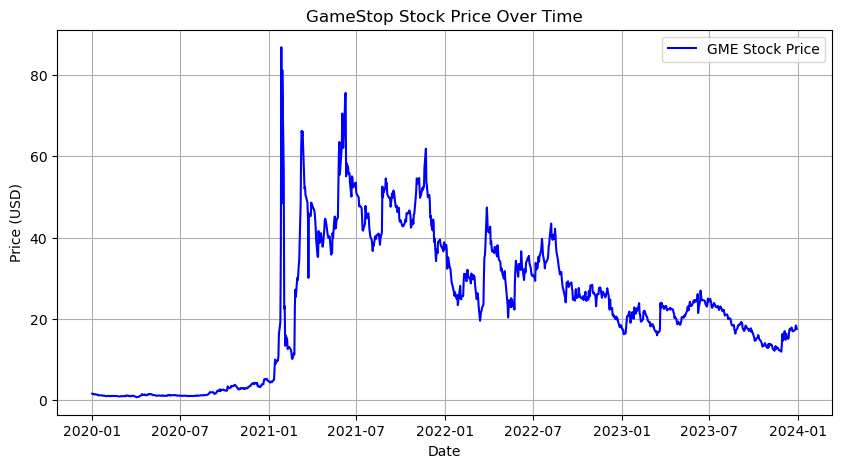

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch GameStop stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')

# Verify the data
print(gme_data.head())

# Plotting GameStop Stock Price
plt.figure(figsize=(10, 5))
plt.plot(gme_data.index, gme_data['Close'], label='GME Stock Price', color='blue')
plt.title('GameStop Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [53]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import yfinance as yf

# Fetch GameStop stock data
gme_data = yf.download('GME', start='2020-01-01', end='2024-01-01')
gme_data.reset_index(inplace=True)

# Fetch GameStop revenue data from a CSV file or an external source
# Make sure you have a CSV file with at least two columns: 'Date' and 'Revenue'
# Replace 'gme_revenue.csv' with your actual revenue data file path
try:
    gme_revenue_df = pd.read_csv('gme_revenue.csv')  # Update with your CSV file path
    gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])
except FileNotFoundError:
    print("Revenue data file not found. Please ensure the file path is correct.")

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("GameStop Stock and Revenue Dashboard"),
    
    dcc.Graph(id='data-graph'),
    
    dcc.Dropdown(
        id='data-dropdown',
        options=[
            {'label': 'GME Stock Price', 'value': 'stock'},
            {'label': 'GME Revenue', 'value': 'revenue'}
        ],
        value='stock',
        clearable=False
    )
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output('data-graph', 'figure'),
    Input('data-dropdown', 'value')
)
def update_graph(selected_value):
    figure = go.Figure()

    if selected_value == 'stock':
        figure.add_trace(go.Scatter(
            x=gme_data['Date'],
            y=gme_data['Close'],
            mode='lines',
            name='GME Stock Price'
        ))
        figure.update_layout(
            title='GameStop Stock Price Over Time',
            xaxis_title='Date',
            yaxis_title='Price (USD)'
        )
    else:  # Revenue
        if 'gme_revenue_df' in locals():  # Check if revenue data is loaded
            figure.add_trace(go.Scatter(
                x=gme_revenue_df['Date'],
                y=gme_revenue_df['Revenue'],
                mode='lines',
                name='GME Revenue',
                line=dict(color='orange')
            ))
            figure.update_layout(
                title='GameStop Revenue Over Time',
                xaxis_title='Date',
                yaxis_title='Revenue (in Millions USD)'
            )
        else:
            figure.update_layout(
                title='Revenue Data Not Available',
                xaxis_title='Date',
                yaxis_title='Revenue'
            )

    return figure

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)



[*********************100%***********************]  1 of 1 completed


Revenue data file not found. Please ensure the file path is correct.
